<a href="https://colab.research.google.com/github/Bhavnicksm/dsp_lab_notebooks/blob/main/EE333_Lab_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 1


In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

1) Write a script to generate the samples of a sinusoid whose frequency and sampling rate are specified
by the user. Also display this in two separate figures, (i) as a continuous sinusoid, (ii) and as the
individual samples. (hint: Use the plot and stem commands).

In [29]:
def sampling_sine(freq, rate):
  lst = np.arange(1,1000,1)
  wave = [np.sin(2*np.pi*freq*x) for x in lst]
  wave_sampled=[]
  for x in lst:
    if x%rate==0:
      wave_sampled.append(wave[x])
    else: wave_sampled.append(0)

  plt.figure(figsize=(15,8))
  plt.plot(wave)
  plt.bar(x=lst,height=wave_sampled)
  plt.show()

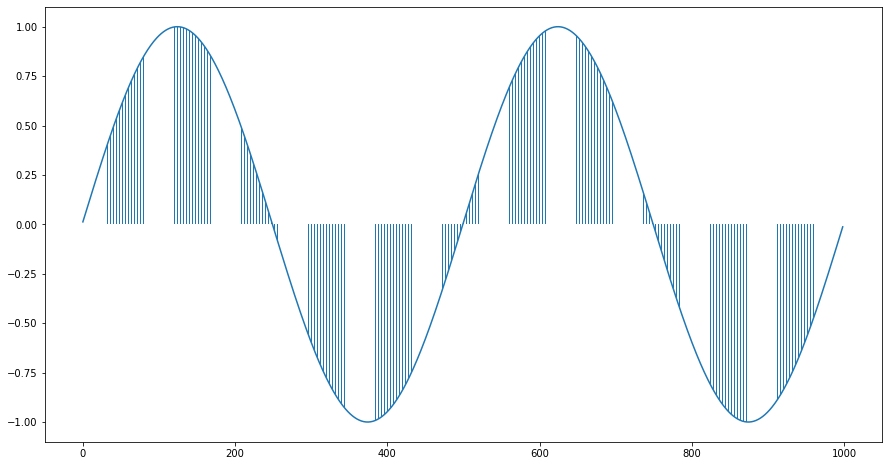

In [41]:
sampling_sine(0.002,4)